In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("Gathered_data.csv")
df

,brand,cpu brand,cpu_model,cpu_generation,cpu_cores,cpu_threads,ram,total storage,ssd,hdd,gpu_brand,gpu_vram,battery_capacity,operating_system,screen_size,ppi,touchscreen,price(in rupees)
0,HP,AMD,Ryzen 5,6,6,12,16,512,1,0,Nvidia,4,50,1,15.6,300,0,60000
1,HP,Intel,Core i7,12,8,16,32,1024,1,0,Nvidia,8,45,1,17.3,300,0,85000
2,HP,AMD,Ryzen 7,7,8,16,16,1024,1,0,AMD,6,55,1,16.1,250,0,70000
3,HP,Intel,Core i5,11,4,8,8,512,1,0,Nvidia,4,40,1,14.0,200,0,45000
4,HP,AMD,Ryzen 9,6,8,16,32,2048,1,0,Nvidia,8,50,1,17.3,400,0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Acer,Intel,Core i5 8265U,8,4,8,16,256,1,1,NVIDIA,2,57,1,14.0,157,0,64000
393,Samsung,AMD,Ryzen 5 2500U,2,4,8,16,256,1,1,AMD,2,59,1,15.6,141,0,66000
394,Sony,Intel,Core i5 10500H,10,4,8,16,512,1,1,NVIDIA,4,61,1,15.6,141,0,69000
395,LG,AMD,Ryzen 5 4500U,4,6,12,16,512,1,1,AMD,2,56,1,15.6,141,0,71000


In [ ]:
df['operating_system'].replace(0,1,inplace = True)
df['operating_system'].value_counts()

operating_system
1    350
2     47
Name: count, dtype: int64

EDA

<ipython-input-5-5335af4de341>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price(in rupees)'])


<Axes: xlabel='price(in rupees)', ylabel='Density'>

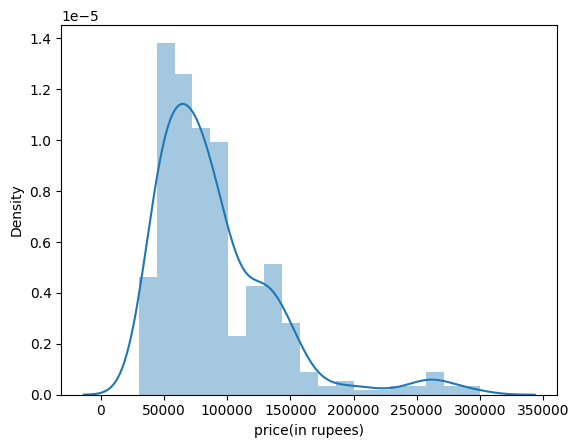

In [ ]:
sns.distplot(df['price(in rupees)'])

<Axes: xlabel='brand'>

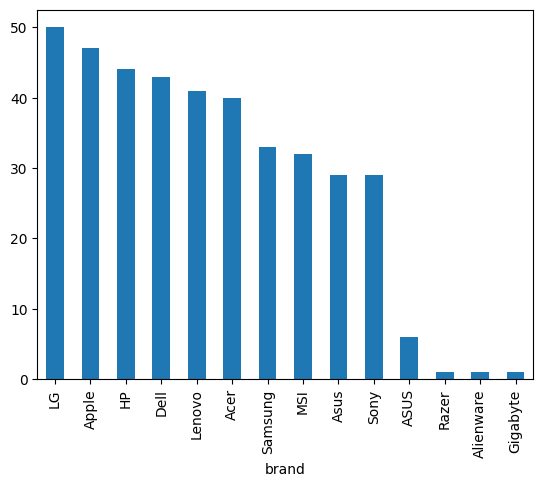

In [ ]:
df['brand'].value_counts().plot(kind='bar')

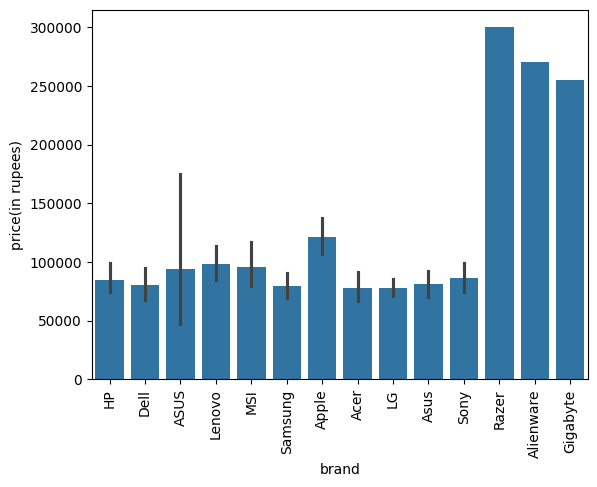

In [ ]:
sns.barplot(x=df['brand'],y=df['price(in rupees)'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-8-ce11477dd196>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['screen_size'])


<Axes: xlabel='screen_size', ylabel='Density'>

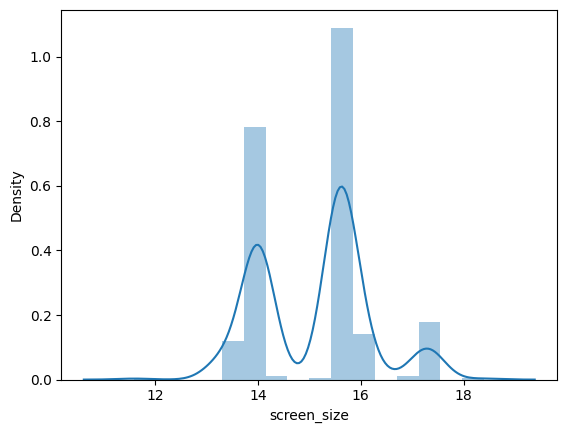

In [ ]:
sns.distplot(df['screen_size'])

<Axes: xlabel='screen_size', ylabel='price(in rupees)'>

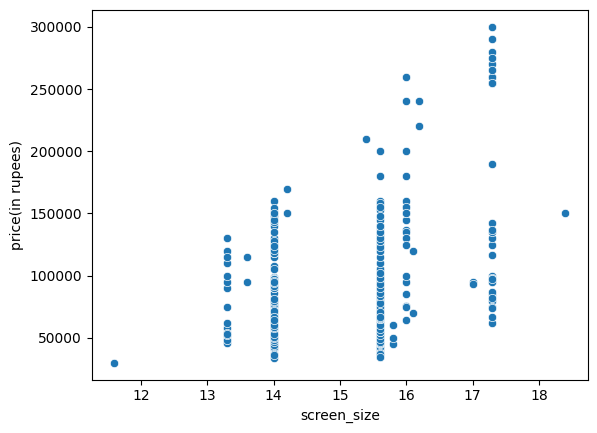

In [ ]:
sns.scatterplot(x=df['screen_size'],y=df['price(in rupees)'])

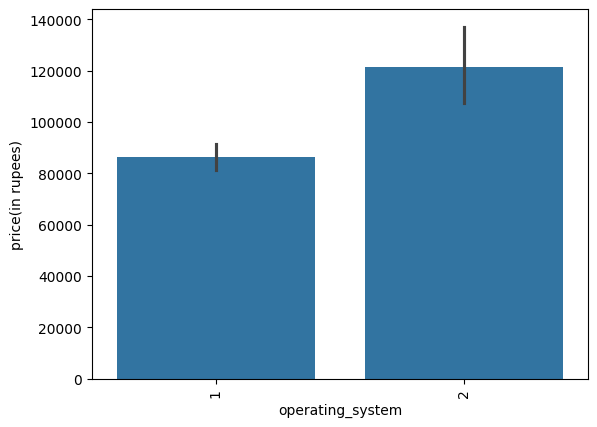

In [ ]:
sns.barplot(x=df['operating_system'],y=df['price(in rupees)'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='touchscreen'>

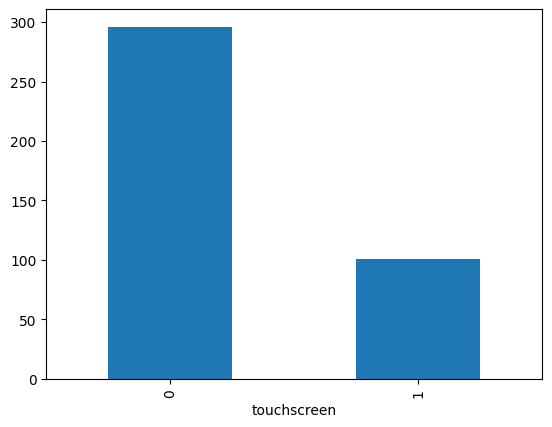

In [ ]:
df['touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='touchscreen', ylabel='price(in rupees)'>

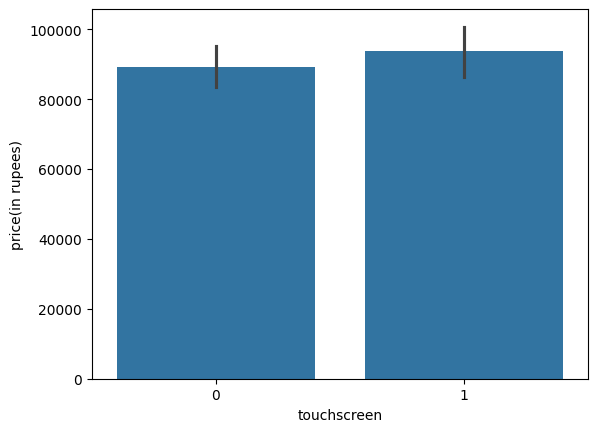

In [ ]:
sns.barplot(x=df['touchscreen'],y=df['price(in rupees)'])

In [ ]:
X = df.drop(columns=['price(in rupees)','gpu_brand','cpu_model'])
y = np.array(df['price(in rupees)'])

In [ ]:
X

,brand,cpu brand,cpu_generation,cpu_cores,cpu_threads,ram,total storage,ssd,hdd,gpu_vram,battery_capacity,operating_system,screen_size,ppi,touchscreen
0,HP,AMD,6,6,12,16,512,1,0,4,50,1,15.6,300,0
1,HP,Intel,12,8,16,32,1024,1,0,8,45,1,17.3,300,0
2,HP,AMD,7,8,16,16,1024,1,0,6,55,1,16.1,250,0
3,HP,Intel,11,4,8,8,512,1,0,4,40,1,14.0,200,0
4,HP,AMD,6,8,16,32,2048,1,0,8,50,1,17.3,400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Acer,Intel,8,4,8,16,256,1,1,2,57,1,14.0,157,0
393,Samsung,AMD,2,4,8,16,256,1,1,2,59,1,15.6,141,0
394,Sony,Intel,10,4,8,16,512,1,1,4,61,1,15.6,141,0
395,LG,AMD,4,6,12,16,512,1,1,2,56,1,15.6,141,0


In [ ]:
y

array([ 60000,  85000,  70000,  45000, 100000, 120000,  40000,  50000,
        80000, 150000,  50000,  75000,  80000,  30000,  45000, 130000,
       125000,  95000, 160000, 145000, 110000, 190000, 135000, 125000,
       105000,  42000,  48000,  52000,  50000,  40000,  45000,  50000,
        52000,  55000,  48000,  42000,  58000,  53000,  45000,  47500,
        62990,  54500,  59990,  90000, 110000, 140000, 160000,  95000,
       115000, 150000, 170000, 220000, 240000,  95000, 120000, 210000,
       180000, 100000, 130000, 240000, 115000, 200000, 260000,  48000,
        54000,  60000,  67000,  40000,  45000,  53000,  51000,  75000,
        90000,  60000,  80000,  65000,  95000,  55000,  70000,  85000,
        62000,  79000,  95000,  58000,  77000,  63000,  93000,  53000,
        68000,  82000,  60000,  76000,  92000,  70000,  75000,  72000,
        76000,  73000,  78000,  71000,  80000,  69000,  74000,  65000,
        68000,  67000,  72000,  69000,  75000,  71000,  78000,  66000,
      

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train

,brand,cpu brand,cpu_generation,cpu_cores,cpu_threads,ram,total storage,ssd,hdd,gpu_vram,battery_capacity,operating_system,screen_size,ppi,touchscreen
129,MSI,Intel,9,4,8,32,1024,1,0,4,57,1,15.6,141,0
370,Asus,AMD,5,8,16,32,1024,1,0,0,108,1,17.3,127,0
256,Samsung,AMD,3,2,4,8,256,1,0,0,47,1,14.0,157,0
215,MSI,Intel,9,6,12,16,512,1,0,6,55,1,15.6,141,0
160,Samsung,Intel,9,4,4,8,256,1,0,0,42,1,14.0,157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Dell,AMD,5,6,12,16,512,1,0,0,62,1,15.6,141,0
22,Lenovo,AMD,5,8,16,16,1000,1,0,6,68,1,15.6,157,0
72,Acer,AMD,4,8,16,16,1000,1,0,6,65,1,14.0,157,0
15,Lenovo,Intel,10,6,12,16,1000,1,0,6,60,1,15.6,141,0


In [ ]:
X_test

,brand,cpu brand,cpu_generation,cpu_cores,cpu_threads,ram,total storage,ssd,hdd,gpu_vram,battery_capacity,operating_system,screen_size,ppi,touchscreen
94,Dell,Intel,12,4,8,16,1000,1,0,0,55,1,15.6,141,0
32,Dell,AMD,3,4,8,8,512,1,0,0,48,1,15.6,141,0
222,Lenovo,Intel,9,8,16,32,2048,1,0,8,65,1,15.6,141,0
331,Lenovo,AMD,4,8,16,16,1024,1,0,0,71,1,15.6,141,0
353,Apple,AMD,5,8,16,16,1024,1,0,0,87,2,16.0,226,1
25,ASUS,AMD,5,4,8,8,256,1,0,0,40,1,14.0,200,0
67,Acer,Intel,10,2,4,8,256,1,0,0,42,1,15.6,141,0
297,Sony,AMD,3,4,8,16,512,1,0,0,59,1,15.6,141,1
157,Acer,Intel,9,4,4,8,256,1,0,0,41,1,14.0,157,0
223,Acer,Intel,9,8,16,32,1024,1,0,8,62,1,14.0,157,0


linear regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6468452380279479
MAE 14050.883467217045


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ridge regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.6105505938985537
MAE 14351.161677575094


lasso regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.414e+10, tolerance: 8.265e+07
  model = cd_fast.enet_coordinate_descent(


R2 score 0.6468453219785484
MAE 14050.88609840717


knn

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7063937815317789
MAE 10305.5


decision trees

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.55548127543504
MAE 10891.881535131535


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


random forest regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8340294887008687
MAE 8289.629444444443


extra trees regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8602573851044147
MAE 6741.26294057794


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


predicting with your data

In [ ]:
brand = "HP"
cpuBrand = "Intel"
cpuGeneration = 11
cpuCores = 6
cpuThreads = 12
ram = 8
storage = 256
ssd = 1
hdd = 0
graphicVram = 0
battery = 70
operatingSystem = 1
screenSize = 15.6
ppi = 200
touchscreen = 0

In [ ]:
yd = np.array([[
brand, cpuBrand, cpuGeneration, cpuCores, cpuThreads, ram, storage, ssd, hdd, graphicVram, battery, operatingSystem, screenSize, ppi, touchscreen
]])
prediction = pipe.predict(yd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


#predicted price

In [ ]:
predicted_price = prediction[0]  # Access the first (and only) element in the array
print(f'The Predicted price with your specifications: {predicted_price}')

The Predicted price with your specifications: 85415.0


In [ ]:
def find_ranges(num):
    str_num = str(num)
    first_digit = int(str_num[0])
    length = len(str_num)

    # Calculate the lowest range
    lowest_range = first_digit * (10 ** (length - 1))

    # Calculate the highest range
    highest_range = (first_digit + 1) * (10 ** (length - 1))

    return lowest_range, highest_range

In [ ]:
laptop = pd.read_csv('laptop_data (1).csv')
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
low , high = find_ranges(int(predicted_price))
print(low ," " , high)

80000   90000


# showing the laptops which are in this range

In [ ]:
result = laptop[laptop['Price'].between(low,high)]

In [ ]:
result[result["Company"] == brand]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
452,452,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.31kg,81731.52
757,757,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59kg,83170.08
931,931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.26kg,84129.12
935,935,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg,88924.32
1011,1011,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.26kg,81997.92
1012,1012,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,84715.20
1025,1025,HP,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,83063.52
1094,1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,85194.72
1122,1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,80612.64
1142,1142,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,86793.12


In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))